In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os

In [5]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Define dataset path (Update this path to your dataset location)
dataset_path = "/content/drive/MyDrive/Final Dataset/training"

In [9]:
# Step 2: Load the dataset using ImageDataGenerator
img_size = (150, 150)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2716 images belonging to 5 classes.
Found 677 images belonging to 5 classes.


In [10]:
# Step 3: Build the CNN model
model = keras.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes: Empty, High, Low, Medium, Traffic Jam
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the model
epochs = 15
history = model.fit(train_data, epochs=epochs, validation_data=val_data)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 1071s 13s/step - accuracy: 0.4146 - loss: 1.5726 - val_accuracy: 0.7031 - val_loss: 0.7877
Epoch 2/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 207ms/step - accuracy: 0.6525 - loss: 0.8406 - val_accuracy: 0.6972 - val_loss: 0.7280
Epoch 3/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 19s 228ms/step - accuracy: 0.7071 - loss: 0.7201 - val_accuracy: 0.7223 - val_loss: 0.6886
Epoch 4/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 17s 205ms/step - accuracy: 0.7202 - loss: 0.6577 - val_accuracy: 0.7548 - val_loss: 0.6404
Epoch 5/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 207ms/step - accuracy: 0.7535 - loss: 0.5959 - val_accuracy: 0.7179 - val_loss: 0.6609
Epoch 6/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 216ms/step - accuracy: 0.7646 - loss: 0.5728 - val_accuracy: 0.7312 - val_loss: 0.6720
Epoch 7/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 206ms/step - accuracy: 0.7936 - loss: 0.5249 - val_accuracy: 0.7504 - val_loss: 0.6597
Epoch 8/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 17s 203ms/step - accuracy: 0.8004 - loss: 0.5189 - val_accu

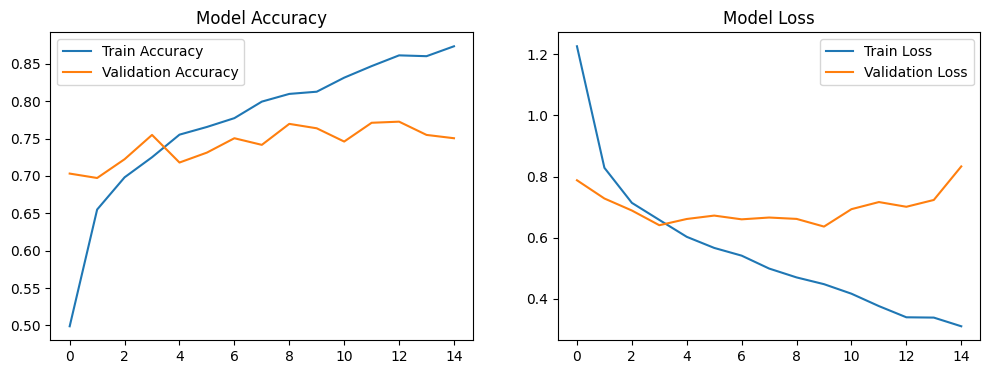

In [12]:
# Step 5: Save the model in both .keras and .h5 formats
model.save("traffic_model.keras")
model.save("traffic_model.h5")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


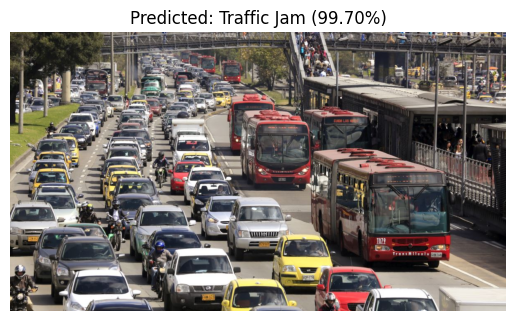

Predicted Label: Traffic Jam, Confidence: 1.00


In [13]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model("traffic_model.keras")  # You can also use "traffic_model.h5"

# Define the class labels (Ensure order matches the training dataset)
class_labels = ["Empty", "High", "Low", "Medium", "Traffic Jam"]

# Function to preprocess and predict an image
def predict_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))  # Resize to match model input
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand to match batch size
    img_array = img_array / 255.0  # Normalize (same as training)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])  # Get class with highest probability
    confidence = np.max(predictions[0])  # Get confidence score

    # Display results
    plt.imshow(cv2.imread(img_path)[..., ::-1])  # Convert BGR to RGB
    plt.title(f"Predicted: {class_labels[predicted_class]} ({confidence*100:.2f}%)")
    plt.axis("off")
    plt.show()

    return class_labels[predicted_class], confidence

# Test with an image
test_image_path = "test.jpg"  # Change this to your test image path
predicted_label, confidence = predict_image(test_image_path)
print(f"Predicted Label: {predicted_label}, Confidence: {confidence:.2f}")
